In [1]:


import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import MaxAbsScaler

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

2023-02-13 18:27:44.682104: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
#dataset = pd.read_pickle('SNR_BBH-injections-5000.pkl')
#dataset = pd.read_pickle('SNR_BBH-injections-reduced-100k.pkl')
dataset = pd.read_pickle('SNR_BBH-injections-reduced-1m.pkl')


dataset.head()

,ds,Mc,q,inc,spin1_mag,spin1_polar,spin1_azimuthal,spin2_mag,spin2_polar,spin2_azimuthal,coa_phase,dec,ra,pol,tc,SNR
0,1000.0,30.336864,2.002997,2.608599,0.559640,0.002940,1.788084,0.263034,0.911996,2.976439,0.0,-0.245609,3.745416,0.0,1.192530e+09,28.436068
1,1000.0,27.933059,1.063466,2.274400,0.070477,1.371662,4.080671,0.910459,0.400873,4.445331,0.0,0.252191,5.392380,0.0,1.192530e+09,9.574330
2,1000.0,19.412520,2.528205,1.988473,0.418485,1.392812,5.568183,0.264728,0.307003,2.490901,0.0,-1.131917,2.674948,0.0,1.192530e+09,11.382175
3,1000.0,21.674950,1.102297,1.628139,0.361641,0.843580,5.902105,0.606076,2.047297,1.159646,0.0,-1.227252,2.150521,0.0,1.192530e+09,5.773854
4,1000.0,38.872794,1.099620,0.809200,0.311437,0.246346,3.251720,0.399867,1.179204,3.741881,0.0,1.086481,3.558429,0.0,1.192530e+09,14.345895


In [3]:
dataset = dataset.loc[dataset["SNR"] <= 100]
dataset.shape

(999996, 16)

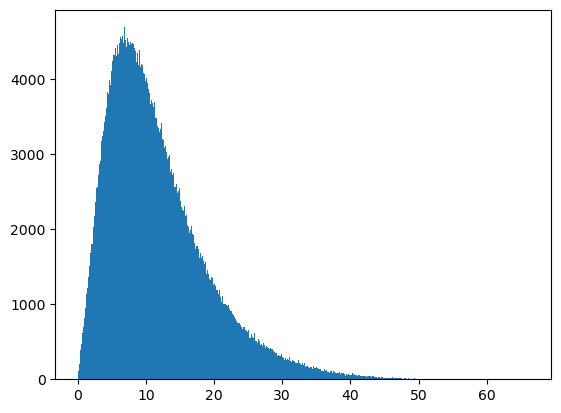

In [4]:
count, bins, ignored = plt.hist(dataset['SNR'], 1000)
plt.show()

In [5]:
#dataset['inc'] = np.cos(dataset['inc'])
#dataset['dec'] = np.sin(dataset['dec'])
#dataset['Mc'] = dataset['Mc']**(5/6)

In [6]:
# Separate Target Variable and Predictor Variables
TargetVariable = ['SNR']
Predictors = ['Mc', 'q', 'inc', 'ra' , 'dec' , 'spin1_mag', 'spin1_polar', 'spin1_azimuthal', 'spin2_mag', 'spin2_polar', 'spin2_azimuthal']
#Predictors = ['ds', 'Mc', 'q', 'inc', 'ra' , 'dec' , 'spin1x', 'spin1y', 'spin1z', 'spin2x', 'spin2y', 'spin2z']

X = dataset[Predictors].values
y = dataset[TargetVariable].values
 
# Sandardization of data #
PredictorScaler = StandardScaler()
Xscaled = PredictorScaler.fit_transform(X)


TargetScaler =  StandardScaler()
yscaled = TargetScaler.fit_transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xscaled, yscaled, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(699997, 11)
(699997, 1)
(299999, 11)
(299999, 1)


In [7]:
#from tensorflow.keras.optimizers import schedules, RMSprop

#boundaries = [10, 10]
#values = [0.0001, 0.0005, 0.001]

#lr_schedule = schedules.PiecewiseConstantDecay(boundaries, values)
#optimizer = RMSprop(learning_rate=lr_schedule)

In [129]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad

# create ANN model
model = Sequential()

input_dim = X_train.shape[1]

neurons = 350 

from tensorflow.keras.initializers import RandomNormal

from keras.layers import PReLU
from keras.initializers import Constant

#kernel_initializer = RandomNormal(mean=0., stddev=0.1, seed=None)
kernel_initializer = RandomNormal

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units = neurons, input_dim=input_dim, kernel_initializer=kernel_initializer, bias_initializer='zeros'))
model.add(PReLU(alpha_initializer=Constant(value=0.25)))          
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units = neurons, kernel_initializer=kernel_initializer, bias_initializer='zeros'))
model.add(PReLU(alpha_initializer=Constant(value=0.25)))          
 
# Defining the Third layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units = neurons, kernel_initializer=kernel_initializer, bias_initializer='zeros'))
model.add(PReLU(alpha_initializer=Constant(value=0.25)))

# Defining the Fourth layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units = neurons, kernel_initializer=kernel_initializer, bias_initializer='zeros'))
model.add(PReLU(alpha_initializer=Constant(value=0.25)))          
 
# Defining the Fifth layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units = neurons, kernel_initializer=kernel_initializer, bias_initializer='zeros'))
model.add(PReLU(alpha_initializer=Constant(value=0.25)))

# Defining the Sixth layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units = neurons, kernel_initializer=kernel_initializer, bias_initializer='zeros'))
model.add(PReLU(alpha_initializer=Constant(value=0.25)))          

# Defining the Seventh layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units = neurons, kernel_initializer=kernel_initializer, bias_initializer='zeros'))
model.add(PReLU(alpha_initializer=Constant(value=0.25)))

# Defining the Eighth layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units = neurons, kernel_initializer=kernel_initializer, bias_initializer='zeros'))
model.add(PReLU(alpha_initializer=Constant(value=0.25)))

# Defining the Ninth layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units = neurons, kernel_initializer=kernel_initializer, bias_initializer='zeros'))
model.add(PReLU(alpha_initializer=Constant(value=0.25)))

# Defining the Tenth layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units = neurons, kernel_initializer=kernel_initializer, bias_initializer='zeros'))
model.add(PReLU(alpha_initializer=Constant(value=0.25)))



# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer=kernel_initializer))
 
    
 
    
#from keras.optimizers import Adamax    
    
    
# Compiling the model
#model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.compile(loss='mean_squared_error', optimizer='Nadam')
#model.compile(loss='mean_squared_error', optimizer='Adam')
#model.compile(loss='mean_squared_error', optimizer=  Adamax())

batch_size = 500 
epochs = 800


# Fitting the ANN to the Training set
history = model.fit(X_train, y_train, validation_split=0.33, batch_size = batch_size, epochs = epochs, verbose=1)


Epoch 1/800
938/938 [==============================] - 5s 5ms/step - loss: 0.3380 - val_loss: 0.0730
Epoch 2/800
938/938 [==============================] - 4s 5ms/step - loss: 0.0692 - val_loss: 0.0387
Epoch 3/800
938/938 [==============================] - 5s 5ms/step - loss: 0.0440 - val_loss: 0.0480
Epoch 4/800
938/938 [==============================] - 5s 5ms/step - loss: 0.0348 - val_loss: 0.0289
Epoch 5/800
938/938 [==============================] - 5s 5ms/step - loss: 0.0299 - val_loss: 0.0266
Epoch 6/800
938/938 [==============================] - 5s 5ms/step - loss: 0.0252 - val_loss: 0.0203
Epoch 7/800
938/938 [==============================] - 5s 5ms/step - loss: 0.0224 - val_loss: 0.0196
Epoch 8/800
938/938 [==============================] - 5s 5ms/step - loss: 0.0196 - val_loss: 0.0202
Epoch 9/800
938/938 [==============================] - 4s 4ms/step - loss: 0.0163 - val_loss: 0.0180
Epoch 10/800
938/938 [==============================] - 4s 5ms/step - loss: 0.0138 - val_lo

### Figure 1

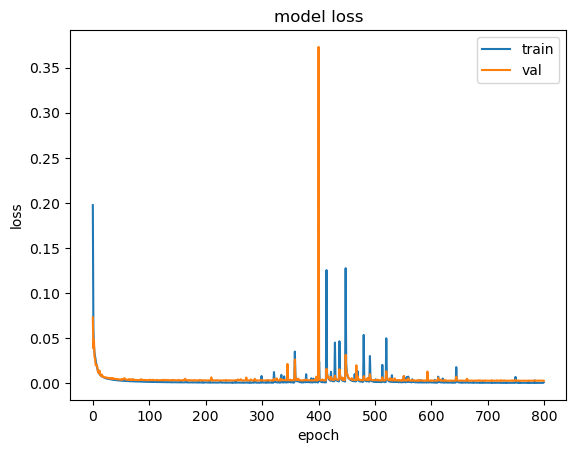

In [130]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig("Figure_loss.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [131]:
# Generating Predictions on testing data
Predictions_scaled = model.predict(X_test)

# Scaling the test data back to original scale
Test_Data = PredictorScaler.inverse_transform(X_test)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetScaler.inverse_transform(y_test)

# Scaling the predicted Price data back to original price scale
Predictions = TargetScaler.inverse_transform(Predictions_scaled)

# Create table with test data and predictions
TestingData = pd.DataFrame( data = Test_Data, columns = Predictors)
TestingData['SNR'] = y_test_orig
TestingData['PredictedSNR'] = Predictions

# Computing the absolute percent error
APE = 100*(abs( (TestingData['SNR']-TestingData['PredictedSNR'])/TestingData['SNR']) )
TestingData['APE']=APE

# Computing the error
Error = TestingData['SNR']-TestingData['PredictedSNR']
TestingData['Error']=Error


TestingData.head()

,Mc,q,inc,ra,dec,spin1_mag,spin1_polar,spin1_azimuthal,spin2_mag,spin2_polar,spin2_azimuthal,SNR,PredictedSNR,APE,Error
0,13.629561,5.024858,0.759582,1.157298,0.546656,0.814804,0.191502,5.077727,0.877996,0.110203,5.707897,13.988222,13.812210,1.258288,0.176012
1,13.506763,1.873409,0.496980,2.336597,0.743398,0.444129,1.696529,5.894138,0.480214,1.640247,3.345891,14.263174,14.151395,0.783689,0.111779
2,16.706566,1.790420,2.224368,1.441924,0.536652,0.038654,1.737126,4.311931,0.670894,0.304500,0.771137,15.918194,16.034235,0.728985,-0.116041
3,31.103646,1.020864,2.009380,3.259870,0.432807,0.269319,0.198721,4.969034,0.881395,1.221976,3.256650,8.188298,8.304841,1.423291,-0.116543
4,22.591072,3.238326,1.340895,5.087919,-0.129831,0.563057,1.479941,3.217394,0.154200,2.685003,2.336052,6.937942,7.127896,2.737893,-0.189953


In [132]:
# Compute MAPE and accuracy

MAPE = np.mean(TestingData['APE'])
accuracy = 100 - MAPE

print('MAPE:', MAPE, 'accuracy:', accuracy)

MAPE: 3.0388261119906415 accuracy: 96.96117388800936


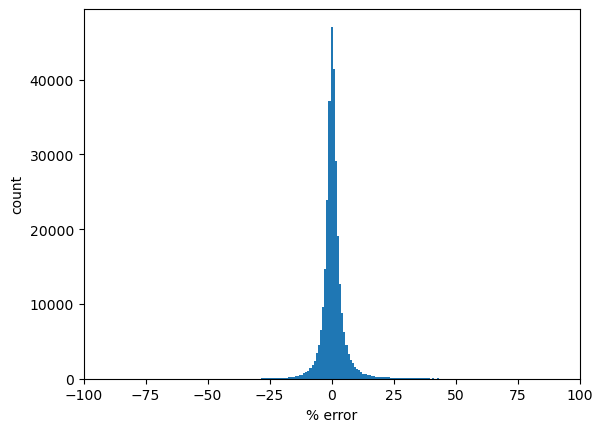

In [133]:
rel_error = 100*(Predictions - y_test_orig)/y_test_orig

count, bins, ignored = plt.hist(rel_error, 2000)
plt.xlabel('% error')
plt.ylabel('count')
plt.xlim(-100,100)

plt.show()

### Figure 2

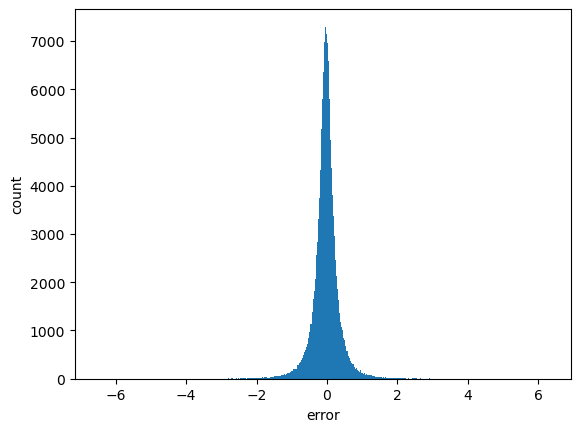

In [134]:
count, bins, ignored = plt.hist(TestingData['Error'], 1000)
#plt.xlim(-100,100)
plt.xlabel('error')
plt.ylabel('count')

plt.savefig("Figure_error.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Figure 3

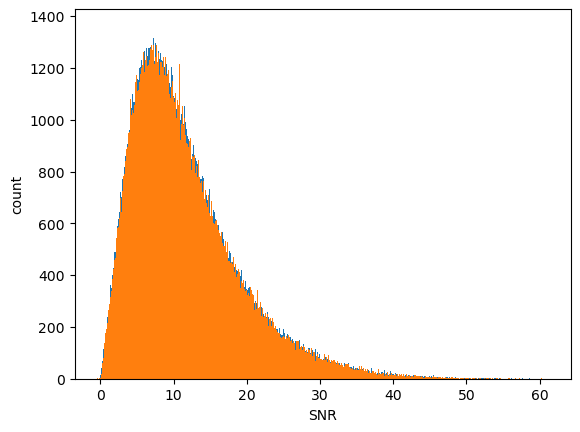

In [135]:
count, bins, ignored = plt.hist(y_test_orig, 1000)
count, bins, ignored = plt.hist(Predictions, 1000)
plt.xlabel('SNR')
plt.ylabel('count')

plt.savefig("Figure_SNR.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Figure 4

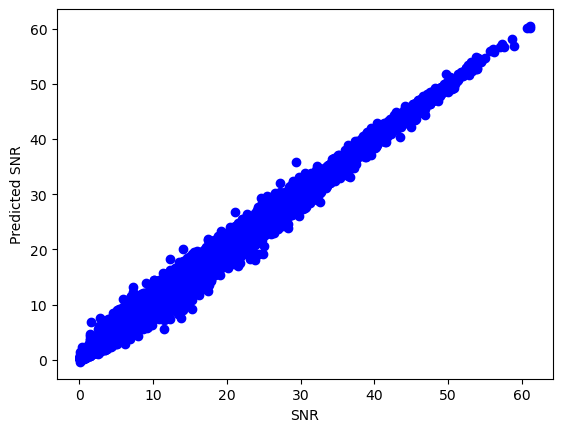

In [136]:
plt.plot(y_test_orig, Predictions, 'bo')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper right')
plt.xlabel('SNR')
plt.ylabel('Predicted SNR')

plt.savefig("Figure_predicted.pdf", format="pdf", bbox_inches="tight")
plt.show()

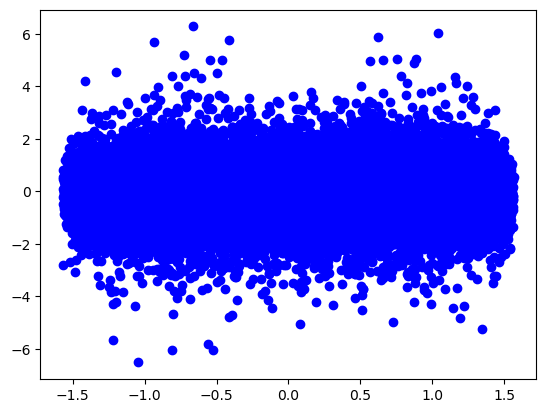

In [137]:
plt.plot(TestingData['dec'], TestingData['Error'], 'bo')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper right')
plt.show()

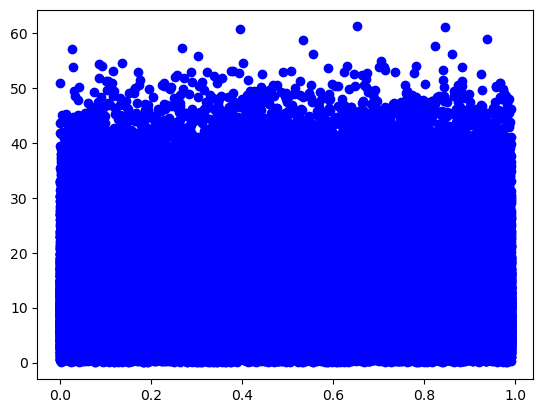

In [138]:
plt.plot(TestingData['spin2_mag'], TestingData['SNR'], 'bo')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper right')
plt.show()

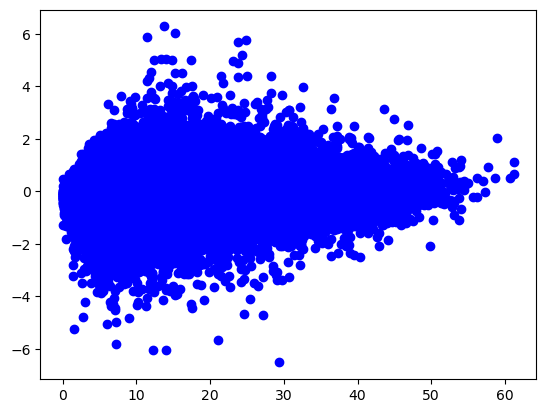

In [139]:
plt.plot(TestingData['SNR'], TestingData['Error'], 'bo')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper right')
plt.show()